In [1]:
from WM_ENV2 import WMEnv             
import numpy as np                              
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
df = pd.read_csv('df.csv')
df.price = df.price.round(1)
df.generation = df.generation.round(1)
df.fixed = df.fixed.round(2)
df.head(10)

,date,fixed,generation,t,price
0,2016-01-01,0.02,0.0,0,23.9
1,2016-01-01,0.07,0.0,1,22.4
2,2016-01-01,0.01,0.0,2,20.6
3,2016-01-01,0.01,0.0,3,16.8
4,2016-01-01,0.07,0.0,4,17.4
5,2016-01-01,0.02,0.0,5,17.0
6,2016-01-01,0.01,0.0,6,15.9
7,2016-01-01,0.06,0.0,7,18.2
8,2016-01-01,0.02,0.2,8,17.7
9,2016-01-01,0.01,0.4,9,19.8


In [3]:
print("max value for price is " + str(round(df["price"].max(),1)))
print("min value for price is " + str(df["price"].min()))
print("max value for generation is " + str(round(df["generation"].max(),1)))
print("min value for generation is " + str(df["generation"].min()))
print("max value for fixed is " + str(round(df["fixed"].max(),1)))
print("min value for fixed is " + str(round(df["fixed"].min(),1)))

max value for price is 105.0
min value for price is 0.0
max value for generation is 8.5
min value for generation is 0.0
max value for fixed is 3.3
min value for fixed is 0.0


In [4]:
discrete_sep = 0.1 # define the discrete separation
time_max = 23 # the max value for the time
time_min = 0 # the minimum value for the time
price_max = 163.5 # the max value for the price
price_min = 0.0
generation_max = 73.3
generation_min = 0.0
fixed_max = 3.3
fixed_min = 0.0
# possible dimension of Q table
first_dimension = (time_max - time_min + 1) * ((price_max - price_min)/discrete_sep + 1) * int(((generation_max - generation_min)/discrete_sep + 1)) * ((fixed_max - fixed_min)/discrete_sep + 1)
#print(first_dimension)

def createQ(total):
    return np.array(np.zeros([total,2]))

qtable = createQ(int(first_dimension))
print(qtable.shape)

(978537407, 2)


In [5]:
fisrt_cycle = ((price_max - price_min)/discrete_sep + 1) * int(((generation_max - generation_min)/discrete_sep + 1)) * ((fixed_max - fixed_min)/discrete_sep + 1)
print(int(fisrt_cycle))
second_cycle = int(((generation_max - generation_min)/discrete_sep + 1)) * ((fixed_max - fixed_min)/discrete_sep + 1)
print(int(second_cycle))
third_cycle = ((fixed_max - fixed_min)/discrete_sep + 1)
print(int(third_cycle))

40772391
24921
33


In [6]:
def find_index(state, first_cycle, second_cycle, third_cycle,discrete_sep):
    time = state[0]
    price = state[1]
    generation = state[2]
    fixed = state[3]
    fixed_index = fixed/discrete_sep
    
    generation_index = generation/discrete_sep * third_cycle
   
    price_index = price/discrete_sep * second_cycle
    if time == 24:
        index = fixed_index + generation_index + price_index
    else:
        index = time * first_cycle + fixed_index + generation_index + price_index
    
    return index

In [7]:
# Hyperparameters
episode = 100000        # Total number of episodes
alpha = 0.5            # Learning rate
gamma = 0.9            # Discount factor
reward = []
energy = []
loss = []
total_energy = []

# List of outcomes to plot
outcomes = []
print('Q-table before training:')
print(qtable)




Q-table before training:
[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [8]:
date_list = df.date.unique()
random.seed(1)
test = date_list[random.sample(range(len(date_list)), 30)]
df_train = df.loc[~df.date.isin(test)]
df_test = df.loc[df.date.isin(test)]

In [11]:
env = WMEnv(df_train, 8, 22, 3, 10, 15, 10, mode = 'training') 
for i in range(episode): 
    if i % 10 == 0:                                                  
        print('<<<<<<<<<Episode: %s' % i)
    s = env.reset()                                               
    episode_reward_sum = 0           

    while True:            
        # finding index
        state = int(find_index(s, 40772391, 24921, 33, 0.1))
        if np.max(qtable[state]) > 0:
            action = np.argmax(qtable[state])
        else:
            playable_actions = [0,1]
            action = np.random.choice(playable_actions)
                                           
        s_, r, done, info = env.step(action)                                
        # Save experience sequences
        new_state = int(find_index(s_, 40772391, 24921, 33, 0.1))
        #print("new_state time is " + str(s_[0]))
        #print(new_state)
        qtable[state, action] = qtable[state, action] + alpha * (r + gamma * np.max(qtable[new_state]) - qtable[state, action])           
        episode_reward_sum += r                           
        s = s_                                                

        if done: 
            energy.append(env.total_energy_cost)
            reward.append(round(episode_reward_sum,2))
            total_energy.append(env.total_net_energy_cost)
            break

<<<<<<<<<Episode: 0
<<<<<<<<<Episode: 10
<<<<<<<<<Episode: 20
<<<<<<<<<Episode: 30
<<<<<<<<<Episode: 40
<<<<<<<<<Episode: 50
<<<<<<<<<Episode: 60
<<<<<<<<<Episode: 70
<<<<<<<<<Episode: 80
<<<<<<<<<Episode: 90
<<<<<<<<<Episode: 100
<<<<<<<<<Episode: 110
<<<<<<<<<Episode: 120
<<<<<<<<<Episode: 130
<<<<<<<<<Episode: 140
<<<<<<<<<Episode: 150
<<<<<<<<<Episode: 160
<<<<<<<<<Episode: 170
<<<<<<<<<Episode: 180
<<<<<<<<<Episode: 190
<<<<<<<<<Episode: 200
<<<<<<<<<Episode: 210
<<<<<<<<<Episode: 220
<<<<<<<<<Episode: 230
<<<<<<<<<Episode: 240
<<<<<<<<<Episode: 250
<<<<<<<<<Episode: 260
<<<<<<<<<Episode: 270
<<<<<<<<<Episode: 280
<<<<<<<<<Episode: 290
<<<<<<<<<Episode: 300
<<<<<<<<<Episode: 310
<<<<<<<<<Episode: 320
<<<<<<<<<Episode: 330
<<<<<<<<<Episode: 340
<<<<<<<<<Episode: 350
<<<<<<<<<Episode: 360
<<<<<<<<<Episode: 370
<<<<<<<<<Episode: 380
<<<<<<<<<Episode: 390
<<<<<<<<<Episode: 400
<<<<<<<<<Episode: 410
<<<<<<<<<Episode: 420
<<<<<<<<<Episode: 430
<<<<<<<<<Episode: 440
<<<<<<<<<Episode: 450

<<<<<<<<<Episode: 3620
<<<<<<<<<Episode: 3630
<<<<<<<<<Episode: 3640
<<<<<<<<<Episode: 3650
<<<<<<<<<Episode: 3660
<<<<<<<<<Episode: 3670
<<<<<<<<<Episode: 3680
<<<<<<<<<Episode: 3690
<<<<<<<<<Episode: 3700
<<<<<<<<<Episode: 3710
<<<<<<<<<Episode: 3720
<<<<<<<<<Episode: 3730
<<<<<<<<<Episode: 3740
<<<<<<<<<Episode: 3750
<<<<<<<<<Episode: 3760
<<<<<<<<<Episode: 3770
<<<<<<<<<Episode: 3780
<<<<<<<<<Episode: 3790
<<<<<<<<<Episode: 3800
<<<<<<<<<Episode: 3810
<<<<<<<<<Episode: 3820
<<<<<<<<<Episode: 3830
<<<<<<<<<Episode: 3840
<<<<<<<<<Episode: 3850
<<<<<<<<<Episode: 3860
<<<<<<<<<Episode: 3870
<<<<<<<<<Episode: 3880
<<<<<<<<<Episode: 3890
<<<<<<<<<Episode: 3900
<<<<<<<<<Episode: 3910
<<<<<<<<<Episode: 3920
<<<<<<<<<Episode: 3930
<<<<<<<<<Episode: 3940
<<<<<<<<<Episode: 3950
<<<<<<<<<Episode: 3960
<<<<<<<<<Episode: 3970
<<<<<<<<<Episode: 3980
<<<<<<<<<Episode: 3990
<<<<<<<<<Episode: 4000
<<<<<<<<<Episode: 4010
<<<<<<<<<Episode: 4020
<<<<<<<<<Episode: 4030
<<<<<<<<<Episode: 4040
<<<<<<<<<Ep

<<<<<<<<<Episode: 7190
<<<<<<<<<Episode: 7200
<<<<<<<<<Episode: 7210
<<<<<<<<<Episode: 7220
<<<<<<<<<Episode: 7230
<<<<<<<<<Episode: 7240
<<<<<<<<<Episode: 7250
<<<<<<<<<Episode: 7260
<<<<<<<<<Episode: 7270
<<<<<<<<<Episode: 7280
<<<<<<<<<Episode: 7290
<<<<<<<<<Episode: 7300
<<<<<<<<<Episode: 7310
<<<<<<<<<Episode: 7320
<<<<<<<<<Episode: 7330
<<<<<<<<<Episode: 7340
<<<<<<<<<Episode: 7350
<<<<<<<<<Episode: 7360
<<<<<<<<<Episode: 7370
<<<<<<<<<Episode: 7380
<<<<<<<<<Episode: 7390
<<<<<<<<<Episode: 7400
<<<<<<<<<Episode: 7410
<<<<<<<<<Episode: 7420
<<<<<<<<<Episode: 7430
<<<<<<<<<Episode: 7440
<<<<<<<<<Episode: 7450
<<<<<<<<<Episode: 7460
<<<<<<<<<Episode: 7470
<<<<<<<<<Episode: 7480
<<<<<<<<<Episode: 7490
<<<<<<<<<Episode: 7500
<<<<<<<<<Episode: 7510
<<<<<<<<<Episode: 7520
<<<<<<<<<Episode: 7530
<<<<<<<<<Episode: 7540
<<<<<<<<<Episode: 7550
<<<<<<<<<Episode: 7560
<<<<<<<<<Episode: 7570
<<<<<<<<<Episode: 7580
<<<<<<<<<Episode: 7590
<<<<<<<<<Episode: 7600
<<<<<<<<<Episode: 7610
<<<<<<<<<Ep

<<<<<<<<<Episode: 10730
<<<<<<<<<Episode: 10740
<<<<<<<<<Episode: 10750
<<<<<<<<<Episode: 10760
<<<<<<<<<Episode: 10770
<<<<<<<<<Episode: 10780
<<<<<<<<<Episode: 10790
<<<<<<<<<Episode: 10800
<<<<<<<<<Episode: 10810
<<<<<<<<<Episode: 10820
<<<<<<<<<Episode: 10830
<<<<<<<<<Episode: 10840
<<<<<<<<<Episode: 10850
<<<<<<<<<Episode: 10860
<<<<<<<<<Episode: 10870
<<<<<<<<<Episode: 10880
<<<<<<<<<Episode: 10890
<<<<<<<<<Episode: 10900
<<<<<<<<<Episode: 10910
<<<<<<<<<Episode: 10920
<<<<<<<<<Episode: 10930
<<<<<<<<<Episode: 10940
<<<<<<<<<Episode: 10950
<<<<<<<<<Episode: 10960
<<<<<<<<<Episode: 10970
<<<<<<<<<Episode: 10980
<<<<<<<<<Episode: 10990
<<<<<<<<<Episode: 11000
<<<<<<<<<Episode: 11010
<<<<<<<<<Episode: 11020
<<<<<<<<<Episode: 11030
<<<<<<<<<Episode: 11040
<<<<<<<<<Episode: 11050
<<<<<<<<<Episode: 11060
<<<<<<<<<Episode: 11070
<<<<<<<<<Episode: 11080
<<<<<<<<<Episode: 11090
<<<<<<<<<Episode: 11100
<<<<<<<<<Episode: 11110
<<<<<<<<<Episode: 11120
<<<<<<<<<Episode: 11130
<<<<<<<<<Episode

<<<<<<<<<Episode: 14150
<<<<<<<<<Episode: 14160
<<<<<<<<<Episode: 14170
<<<<<<<<<Episode: 14180
<<<<<<<<<Episode: 14190
<<<<<<<<<Episode: 14200
<<<<<<<<<Episode: 14210
<<<<<<<<<Episode: 14220
<<<<<<<<<Episode: 14230
<<<<<<<<<Episode: 14240
<<<<<<<<<Episode: 14250
<<<<<<<<<Episode: 14260
<<<<<<<<<Episode: 14270
<<<<<<<<<Episode: 14280
<<<<<<<<<Episode: 14290
<<<<<<<<<Episode: 14300
<<<<<<<<<Episode: 14310
<<<<<<<<<Episode: 14320
<<<<<<<<<Episode: 14330
<<<<<<<<<Episode: 14340
<<<<<<<<<Episode: 14350
<<<<<<<<<Episode: 14360
<<<<<<<<<Episode: 14370
<<<<<<<<<Episode: 14380
<<<<<<<<<Episode: 14390
<<<<<<<<<Episode: 14400
<<<<<<<<<Episode: 14410
<<<<<<<<<Episode: 14420
<<<<<<<<<Episode: 14430
<<<<<<<<<Episode: 14440
<<<<<<<<<Episode: 14450
<<<<<<<<<Episode: 14460
<<<<<<<<<Episode: 14470
<<<<<<<<<Episode: 14480
<<<<<<<<<Episode: 14490
<<<<<<<<<Episode: 14500
<<<<<<<<<Episode: 14510
<<<<<<<<<Episode: 14520
<<<<<<<<<Episode: 14530
<<<<<<<<<Episode: 14540
<<<<<<<<<Episode: 14550
<<<<<<<<<Episode

<<<<<<<<<Episode: 17570
<<<<<<<<<Episode: 17580
<<<<<<<<<Episode: 17590
<<<<<<<<<Episode: 17600
<<<<<<<<<Episode: 17610
<<<<<<<<<Episode: 17620
<<<<<<<<<Episode: 17630
<<<<<<<<<Episode: 17640
<<<<<<<<<Episode: 17650
<<<<<<<<<Episode: 17660
<<<<<<<<<Episode: 17670
<<<<<<<<<Episode: 17680
<<<<<<<<<Episode: 17690
<<<<<<<<<Episode: 17700
<<<<<<<<<Episode: 17710
<<<<<<<<<Episode: 17720
<<<<<<<<<Episode: 17730
<<<<<<<<<Episode: 17740
<<<<<<<<<Episode: 17750
<<<<<<<<<Episode: 17760
<<<<<<<<<Episode: 17770
<<<<<<<<<Episode: 17780
<<<<<<<<<Episode: 17790
<<<<<<<<<Episode: 17800
<<<<<<<<<Episode: 17810
<<<<<<<<<Episode: 17820
<<<<<<<<<Episode: 17830
<<<<<<<<<Episode: 17840
<<<<<<<<<Episode: 17850
<<<<<<<<<Episode: 17860
<<<<<<<<<Episode: 17870
<<<<<<<<<Episode: 17880
<<<<<<<<<Episode: 17890
<<<<<<<<<Episode: 17900
<<<<<<<<<Episode: 17910
<<<<<<<<<Episode: 17920
<<<<<<<<<Episode: 17930
<<<<<<<<<Episode: 17940
<<<<<<<<<Episode: 17950
<<<<<<<<<Episode: 17960
<<<<<<<<<Episode: 17970
<<<<<<<<<Episode

<<<<<<<<<Episode: 20990
<<<<<<<<<Episode: 21000
<<<<<<<<<Episode: 21010
<<<<<<<<<Episode: 21020
<<<<<<<<<Episode: 21030
<<<<<<<<<Episode: 21040
<<<<<<<<<Episode: 21050
<<<<<<<<<Episode: 21060
<<<<<<<<<Episode: 21070
<<<<<<<<<Episode: 21080
<<<<<<<<<Episode: 21090
<<<<<<<<<Episode: 21100
<<<<<<<<<Episode: 21110
<<<<<<<<<Episode: 21120
<<<<<<<<<Episode: 21130
<<<<<<<<<Episode: 21140
<<<<<<<<<Episode: 21150
<<<<<<<<<Episode: 21160
<<<<<<<<<Episode: 21170
<<<<<<<<<Episode: 21180
<<<<<<<<<Episode: 21190
<<<<<<<<<Episode: 21200
<<<<<<<<<Episode: 21210
<<<<<<<<<Episode: 21220
<<<<<<<<<Episode: 21230
<<<<<<<<<Episode: 21240
<<<<<<<<<Episode: 21250
<<<<<<<<<Episode: 21260
<<<<<<<<<Episode: 21270
<<<<<<<<<Episode: 21280
<<<<<<<<<Episode: 21290
<<<<<<<<<Episode: 21300
<<<<<<<<<Episode: 21310
<<<<<<<<<Episode: 21320
<<<<<<<<<Episode: 21330
<<<<<<<<<Episode: 21340
<<<<<<<<<Episode: 21350
<<<<<<<<<Episode: 21360
<<<<<<<<<Episode: 21370
<<<<<<<<<Episode: 21380
<<<<<<<<<Episode: 21390
<<<<<<<<<Episode

<<<<<<<<<Episode: 24410
<<<<<<<<<Episode: 24420
<<<<<<<<<Episode: 24430
<<<<<<<<<Episode: 24440
<<<<<<<<<Episode: 24450
<<<<<<<<<Episode: 24460
<<<<<<<<<Episode: 24470
<<<<<<<<<Episode: 24480
<<<<<<<<<Episode: 24490
<<<<<<<<<Episode: 24500
<<<<<<<<<Episode: 24510
<<<<<<<<<Episode: 24520
<<<<<<<<<Episode: 24530
<<<<<<<<<Episode: 24540
<<<<<<<<<Episode: 24550
<<<<<<<<<Episode: 24560
<<<<<<<<<Episode: 24570
<<<<<<<<<Episode: 24580
<<<<<<<<<Episode: 24590
<<<<<<<<<Episode: 24600
<<<<<<<<<Episode: 24610
<<<<<<<<<Episode: 24620
<<<<<<<<<Episode: 24630
<<<<<<<<<Episode: 24640
<<<<<<<<<Episode: 24650
<<<<<<<<<Episode: 24660
<<<<<<<<<Episode: 24670
<<<<<<<<<Episode: 24680
<<<<<<<<<Episode: 24690
<<<<<<<<<Episode: 24700
<<<<<<<<<Episode: 24710
<<<<<<<<<Episode: 24720
<<<<<<<<<Episode: 24730
<<<<<<<<<Episode: 24740
<<<<<<<<<Episode: 24750
<<<<<<<<<Episode: 24760
<<<<<<<<<Episode: 24770
<<<<<<<<<Episode: 24780
<<<<<<<<<Episode: 24790
<<<<<<<<<Episode: 24800
<<<<<<<<<Episode: 24810
<<<<<<<<<Episode

<<<<<<<<<Episode: 27830
<<<<<<<<<Episode: 27840
<<<<<<<<<Episode: 27850
<<<<<<<<<Episode: 27860
<<<<<<<<<Episode: 27870
<<<<<<<<<Episode: 27880
<<<<<<<<<Episode: 27890
<<<<<<<<<Episode: 27900
<<<<<<<<<Episode: 27910
<<<<<<<<<Episode: 27920
<<<<<<<<<Episode: 27930
<<<<<<<<<Episode: 27940
<<<<<<<<<Episode: 27950
<<<<<<<<<Episode: 27960
<<<<<<<<<Episode: 27970
<<<<<<<<<Episode: 27980
<<<<<<<<<Episode: 27990
<<<<<<<<<Episode: 28000
<<<<<<<<<Episode: 28010
<<<<<<<<<Episode: 28020
<<<<<<<<<Episode: 28030
<<<<<<<<<Episode: 28040
<<<<<<<<<Episode: 28050
<<<<<<<<<Episode: 28060
<<<<<<<<<Episode: 28070
<<<<<<<<<Episode: 28080
<<<<<<<<<Episode: 28090
<<<<<<<<<Episode: 28100
<<<<<<<<<Episode: 28110
<<<<<<<<<Episode: 28120
<<<<<<<<<Episode: 28130
<<<<<<<<<Episode: 28140
<<<<<<<<<Episode: 28150
<<<<<<<<<Episode: 28160
<<<<<<<<<Episode: 28170
<<<<<<<<<Episode: 28180
<<<<<<<<<Episode: 28190
<<<<<<<<<Episode: 28200
<<<<<<<<<Episode: 28210
<<<<<<<<<Episode: 28220
<<<<<<<<<Episode: 28230
<<<<<<<<<Episode

<<<<<<<<<Episode: 31250
<<<<<<<<<Episode: 31260
<<<<<<<<<Episode: 31270
<<<<<<<<<Episode: 31280
<<<<<<<<<Episode: 31290
<<<<<<<<<Episode: 31300
<<<<<<<<<Episode: 31310
<<<<<<<<<Episode: 31320
<<<<<<<<<Episode: 31330
<<<<<<<<<Episode: 31340
<<<<<<<<<Episode: 31350
<<<<<<<<<Episode: 31360
<<<<<<<<<Episode: 31370
<<<<<<<<<Episode: 31380
<<<<<<<<<Episode: 31390
<<<<<<<<<Episode: 31400
<<<<<<<<<Episode: 31410
<<<<<<<<<Episode: 31420
<<<<<<<<<Episode: 31430
<<<<<<<<<Episode: 31440
<<<<<<<<<Episode: 31450
<<<<<<<<<Episode: 31460
<<<<<<<<<Episode: 31470
<<<<<<<<<Episode: 31480
<<<<<<<<<Episode: 31490
<<<<<<<<<Episode: 31500
<<<<<<<<<Episode: 31510
<<<<<<<<<Episode: 31520
<<<<<<<<<Episode: 31530
<<<<<<<<<Episode: 31540
<<<<<<<<<Episode: 31550
<<<<<<<<<Episode: 31560
<<<<<<<<<Episode: 31570
<<<<<<<<<Episode: 31580
<<<<<<<<<Episode: 31590
<<<<<<<<<Episode: 31600
<<<<<<<<<Episode: 31610
<<<<<<<<<Episode: 31620
<<<<<<<<<Episode: 31630
<<<<<<<<<Episode: 31640
<<<<<<<<<Episode: 31650
<<<<<<<<<Episode

<<<<<<<<<Episode: 34670
<<<<<<<<<Episode: 34680
<<<<<<<<<Episode: 34690
<<<<<<<<<Episode: 34700
<<<<<<<<<Episode: 34710
<<<<<<<<<Episode: 34720
<<<<<<<<<Episode: 34730
<<<<<<<<<Episode: 34740
<<<<<<<<<Episode: 34750
<<<<<<<<<Episode: 34760
<<<<<<<<<Episode: 34770
<<<<<<<<<Episode: 34780
<<<<<<<<<Episode: 34790
<<<<<<<<<Episode: 34800
<<<<<<<<<Episode: 34810
<<<<<<<<<Episode: 34820
<<<<<<<<<Episode: 34830
<<<<<<<<<Episode: 34840
<<<<<<<<<Episode: 34850
<<<<<<<<<Episode: 34860
<<<<<<<<<Episode: 34870
<<<<<<<<<Episode: 34880
<<<<<<<<<Episode: 34890
<<<<<<<<<Episode: 34900
<<<<<<<<<Episode: 34910
<<<<<<<<<Episode: 34920
<<<<<<<<<Episode: 34930
<<<<<<<<<Episode: 34940
<<<<<<<<<Episode: 34950
<<<<<<<<<Episode: 34960
<<<<<<<<<Episode: 34970
<<<<<<<<<Episode: 34980
<<<<<<<<<Episode: 34990
<<<<<<<<<Episode: 35000
<<<<<<<<<Episode: 35010
<<<<<<<<<Episode: 35020
<<<<<<<<<Episode: 35030
<<<<<<<<<Episode: 35040
<<<<<<<<<Episode: 35050
<<<<<<<<<Episode: 35060
<<<<<<<<<Episode: 35070
<<<<<<<<<Episode

<<<<<<<<<Episode: 38090
<<<<<<<<<Episode: 38100
<<<<<<<<<Episode: 38110
<<<<<<<<<Episode: 38120
<<<<<<<<<Episode: 38130
<<<<<<<<<Episode: 38140
<<<<<<<<<Episode: 38150
<<<<<<<<<Episode: 38160
<<<<<<<<<Episode: 38170
<<<<<<<<<Episode: 38180
<<<<<<<<<Episode: 38190
<<<<<<<<<Episode: 38200
<<<<<<<<<Episode: 38210
<<<<<<<<<Episode: 38220
<<<<<<<<<Episode: 38230
<<<<<<<<<Episode: 38240
<<<<<<<<<Episode: 38250
<<<<<<<<<Episode: 38260
<<<<<<<<<Episode: 38270
<<<<<<<<<Episode: 38280
<<<<<<<<<Episode: 38290
<<<<<<<<<Episode: 38300
<<<<<<<<<Episode: 38310
<<<<<<<<<Episode: 38320
<<<<<<<<<Episode: 38330
<<<<<<<<<Episode: 38340
<<<<<<<<<Episode: 38350
<<<<<<<<<Episode: 38360
<<<<<<<<<Episode: 38370
<<<<<<<<<Episode: 38380
<<<<<<<<<Episode: 38390
<<<<<<<<<Episode: 38400
<<<<<<<<<Episode: 38410
<<<<<<<<<Episode: 38420
<<<<<<<<<Episode: 38430
<<<<<<<<<Episode: 38440
<<<<<<<<<Episode: 38450
<<<<<<<<<Episode: 38460
<<<<<<<<<Episode: 38470
<<<<<<<<<Episode: 38480
<<<<<<<<<Episode: 38490
<<<<<<<<<Episode

<<<<<<<<<Episode: 41510
<<<<<<<<<Episode: 41520
<<<<<<<<<Episode: 41530
<<<<<<<<<Episode: 41540
<<<<<<<<<Episode: 41550
<<<<<<<<<Episode: 41560
<<<<<<<<<Episode: 41570
<<<<<<<<<Episode: 41580
<<<<<<<<<Episode: 41590
<<<<<<<<<Episode: 41600
<<<<<<<<<Episode: 41610
<<<<<<<<<Episode: 41620
<<<<<<<<<Episode: 41630
<<<<<<<<<Episode: 41640
<<<<<<<<<Episode: 41650
<<<<<<<<<Episode: 41660
<<<<<<<<<Episode: 41670
<<<<<<<<<Episode: 41680
<<<<<<<<<Episode: 41690
<<<<<<<<<Episode: 41700
<<<<<<<<<Episode: 41710
<<<<<<<<<Episode: 41720
<<<<<<<<<Episode: 41730
<<<<<<<<<Episode: 41740
<<<<<<<<<Episode: 41750
<<<<<<<<<Episode: 41760
<<<<<<<<<Episode: 41770
<<<<<<<<<Episode: 41780
<<<<<<<<<Episode: 41790
<<<<<<<<<Episode: 41800
<<<<<<<<<Episode: 41810
<<<<<<<<<Episode: 41820
<<<<<<<<<Episode: 41830
<<<<<<<<<Episode: 41840
<<<<<<<<<Episode: 41850
<<<<<<<<<Episode: 41860
<<<<<<<<<Episode: 41870
<<<<<<<<<Episode: 41880
<<<<<<<<<Episode: 41890
<<<<<<<<<Episode: 41900
<<<<<<<<<Episode: 41910
<<<<<<<<<Episode

<<<<<<<<<Episode: 44930
<<<<<<<<<Episode: 44940
<<<<<<<<<Episode: 44950
<<<<<<<<<Episode: 44960
<<<<<<<<<Episode: 44970
<<<<<<<<<Episode: 44980
<<<<<<<<<Episode: 44990
<<<<<<<<<Episode: 45000
<<<<<<<<<Episode: 45010
<<<<<<<<<Episode: 45020
<<<<<<<<<Episode: 45030
<<<<<<<<<Episode: 45040
<<<<<<<<<Episode: 45050
<<<<<<<<<Episode: 45060
<<<<<<<<<Episode: 45070
<<<<<<<<<Episode: 45080
<<<<<<<<<Episode: 45090
<<<<<<<<<Episode: 45100
<<<<<<<<<Episode: 45110
<<<<<<<<<Episode: 45120
<<<<<<<<<Episode: 45130
<<<<<<<<<Episode: 45140
<<<<<<<<<Episode: 45150
<<<<<<<<<Episode: 45160
<<<<<<<<<Episode: 45170
<<<<<<<<<Episode: 45180
<<<<<<<<<Episode: 45190
<<<<<<<<<Episode: 45200
<<<<<<<<<Episode: 45210
<<<<<<<<<Episode: 45220
<<<<<<<<<Episode: 45230
<<<<<<<<<Episode: 45240
<<<<<<<<<Episode: 45250
<<<<<<<<<Episode: 45260
<<<<<<<<<Episode: 45270
<<<<<<<<<Episode: 45280
<<<<<<<<<Episode: 45290
<<<<<<<<<Episode: 45300
<<<<<<<<<Episode: 45310
<<<<<<<<<Episode: 45320
<<<<<<<<<Episode: 45330
<<<<<<<<<Episode

<<<<<<<<<Episode: 48350
<<<<<<<<<Episode: 48360
<<<<<<<<<Episode: 48370
<<<<<<<<<Episode: 48380
<<<<<<<<<Episode: 48390
<<<<<<<<<Episode: 48400
<<<<<<<<<Episode: 48410
<<<<<<<<<Episode: 48420
<<<<<<<<<Episode: 48430
<<<<<<<<<Episode: 48440
<<<<<<<<<Episode: 48450
<<<<<<<<<Episode: 48460
<<<<<<<<<Episode: 48470
<<<<<<<<<Episode: 48480
<<<<<<<<<Episode: 48490
<<<<<<<<<Episode: 48500
<<<<<<<<<Episode: 48510
<<<<<<<<<Episode: 48520
<<<<<<<<<Episode: 48530
<<<<<<<<<Episode: 48540
<<<<<<<<<Episode: 48550
<<<<<<<<<Episode: 48560
<<<<<<<<<Episode: 48570
<<<<<<<<<Episode: 48580
<<<<<<<<<Episode: 48590
<<<<<<<<<Episode: 48600
<<<<<<<<<Episode: 48610
<<<<<<<<<Episode: 48620
<<<<<<<<<Episode: 48630
<<<<<<<<<Episode: 48640
<<<<<<<<<Episode: 48650
<<<<<<<<<Episode: 48660
<<<<<<<<<Episode: 48670
<<<<<<<<<Episode: 48680
<<<<<<<<<Episode: 48690
<<<<<<<<<Episode: 48700
<<<<<<<<<Episode: 48710
<<<<<<<<<Episode: 48720
<<<<<<<<<Episode: 48730
<<<<<<<<<Episode: 48740
<<<<<<<<<Episode: 48750
<<<<<<<<<Episode

<<<<<<<<<Episode: 51770
<<<<<<<<<Episode: 51780
<<<<<<<<<Episode: 51790
<<<<<<<<<Episode: 51800
<<<<<<<<<Episode: 51810
<<<<<<<<<Episode: 51820
<<<<<<<<<Episode: 51830
<<<<<<<<<Episode: 51840
<<<<<<<<<Episode: 51850
<<<<<<<<<Episode: 51860
<<<<<<<<<Episode: 51870
<<<<<<<<<Episode: 51880
<<<<<<<<<Episode: 51890
<<<<<<<<<Episode: 51900
<<<<<<<<<Episode: 51910
<<<<<<<<<Episode: 51920
<<<<<<<<<Episode: 51930
<<<<<<<<<Episode: 51940
<<<<<<<<<Episode: 51950
<<<<<<<<<Episode: 51960
<<<<<<<<<Episode: 51970
<<<<<<<<<Episode: 51980
<<<<<<<<<Episode: 51990
<<<<<<<<<Episode: 52000
<<<<<<<<<Episode: 52010
<<<<<<<<<Episode: 52020
<<<<<<<<<Episode: 52030
<<<<<<<<<Episode: 52040
<<<<<<<<<Episode: 52050
<<<<<<<<<Episode: 52060
<<<<<<<<<Episode: 52070
<<<<<<<<<Episode: 52080
<<<<<<<<<Episode: 52090
<<<<<<<<<Episode: 52100
<<<<<<<<<Episode: 52110
<<<<<<<<<Episode: 52120
<<<<<<<<<Episode: 52130
<<<<<<<<<Episode: 52140
<<<<<<<<<Episode: 52150
<<<<<<<<<Episode: 52160
<<<<<<<<<Episode: 52170
<<<<<<<<<Episode

<<<<<<<<<Episode: 55190
<<<<<<<<<Episode: 55200
<<<<<<<<<Episode: 55210
<<<<<<<<<Episode: 55220
<<<<<<<<<Episode: 55230
<<<<<<<<<Episode: 55240
<<<<<<<<<Episode: 55250
<<<<<<<<<Episode: 55260
<<<<<<<<<Episode: 55270
<<<<<<<<<Episode: 55280
<<<<<<<<<Episode: 55290
<<<<<<<<<Episode: 55300
<<<<<<<<<Episode: 55310
<<<<<<<<<Episode: 55320
<<<<<<<<<Episode: 55330
<<<<<<<<<Episode: 55340
<<<<<<<<<Episode: 55350
<<<<<<<<<Episode: 55360
<<<<<<<<<Episode: 55370
<<<<<<<<<Episode: 55380
<<<<<<<<<Episode: 55390
<<<<<<<<<Episode: 55400
<<<<<<<<<Episode: 55410
<<<<<<<<<Episode: 55420
<<<<<<<<<Episode: 55430
<<<<<<<<<Episode: 55440
<<<<<<<<<Episode: 55450
<<<<<<<<<Episode: 55460
<<<<<<<<<Episode: 55470
<<<<<<<<<Episode: 55480
<<<<<<<<<Episode: 55490
<<<<<<<<<Episode: 55500
<<<<<<<<<Episode: 55510
<<<<<<<<<Episode: 55520
<<<<<<<<<Episode: 55530
<<<<<<<<<Episode: 55540
<<<<<<<<<Episode: 55550
<<<<<<<<<Episode: 55560
<<<<<<<<<Episode: 55570
<<<<<<<<<Episode: 55580
<<<<<<<<<Episode: 55590
<<<<<<<<<Episode

<<<<<<<<<Episode: 58610
<<<<<<<<<Episode: 58620
<<<<<<<<<Episode: 58630
<<<<<<<<<Episode: 58640
<<<<<<<<<Episode: 58650
<<<<<<<<<Episode: 58660
<<<<<<<<<Episode: 58670
<<<<<<<<<Episode: 58680
<<<<<<<<<Episode: 58690
<<<<<<<<<Episode: 58700
<<<<<<<<<Episode: 58710
<<<<<<<<<Episode: 58720
<<<<<<<<<Episode: 58730
<<<<<<<<<Episode: 58740
<<<<<<<<<Episode: 58750
<<<<<<<<<Episode: 58760
<<<<<<<<<Episode: 58770
<<<<<<<<<Episode: 58780
<<<<<<<<<Episode: 58790
<<<<<<<<<Episode: 58800
<<<<<<<<<Episode: 58810
<<<<<<<<<Episode: 58820
<<<<<<<<<Episode: 58830
<<<<<<<<<Episode: 58840
<<<<<<<<<Episode: 58850
<<<<<<<<<Episode: 58860
<<<<<<<<<Episode: 58870
<<<<<<<<<Episode: 58880
<<<<<<<<<Episode: 58890
<<<<<<<<<Episode: 58900
<<<<<<<<<Episode: 58910
<<<<<<<<<Episode: 58920
<<<<<<<<<Episode: 58930
<<<<<<<<<Episode: 58940
<<<<<<<<<Episode: 58950
<<<<<<<<<Episode: 58960
<<<<<<<<<Episode: 58970
<<<<<<<<<Episode: 58980
<<<<<<<<<Episode: 58990
<<<<<<<<<Episode: 59000
<<<<<<<<<Episode: 59010
<<<<<<<<<Episode

<<<<<<<<<Episode: 62030
<<<<<<<<<Episode: 62040
<<<<<<<<<Episode: 62050
<<<<<<<<<Episode: 62060
<<<<<<<<<Episode: 62070
<<<<<<<<<Episode: 62080
<<<<<<<<<Episode: 62090
<<<<<<<<<Episode: 62100
<<<<<<<<<Episode: 62110
<<<<<<<<<Episode: 62120
<<<<<<<<<Episode: 62130
<<<<<<<<<Episode: 62140
<<<<<<<<<Episode: 62150
<<<<<<<<<Episode: 62160
<<<<<<<<<Episode: 62170
<<<<<<<<<Episode: 62180
<<<<<<<<<Episode: 62190
<<<<<<<<<Episode: 62200
<<<<<<<<<Episode: 62210
<<<<<<<<<Episode: 62220
<<<<<<<<<Episode: 62230
<<<<<<<<<Episode: 62240
<<<<<<<<<Episode: 62250
<<<<<<<<<Episode: 62260
<<<<<<<<<Episode: 62270
<<<<<<<<<Episode: 62280
<<<<<<<<<Episode: 62290
<<<<<<<<<Episode: 62300
<<<<<<<<<Episode: 62310
<<<<<<<<<Episode: 62320
<<<<<<<<<Episode: 62330
<<<<<<<<<Episode: 62340
<<<<<<<<<Episode: 62350
<<<<<<<<<Episode: 62360
<<<<<<<<<Episode: 62370
<<<<<<<<<Episode: 62380
<<<<<<<<<Episode: 62390
<<<<<<<<<Episode: 62400
<<<<<<<<<Episode: 62410
<<<<<<<<<Episode: 62420
<<<<<<<<<Episode: 62430
<<<<<<<<<Episode

<<<<<<<<<Episode: 65450
<<<<<<<<<Episode: 65460
<<<<<<<<<Episode: 65470
<<<<<<<<<Episode: 65480
<<<<<<<<<Episode: 65490
<<<<<<<<<Episode: 65500
<<<<<<<<<Episode: 65510
<<<<<<<<<Episode: 65520
<<<<<<<<<Episode: 65530
<<<<<<<<<Episode: 65540
<<<<<<<<<Episode: 65550
<<<<<<<<<Episode: 65560
<<<<<<<<<Episode: 65570
<<<<<<<<<Episode: 65580
<<<<<<<<<Episode: 65590
<<<<<<<<<Episode: 65600
<<<<<<<<<Episode: 65610
<<<<<<<<<Episode: 65620
<<<<<<<<<Episode: 65630
<<<<<<<<<Episode: 65640
<<<<<<<<<Episode: 65650
<<<<<<<<<Episode: 65660
<<<<<<<<<Episode: 65670
<<<<<<<<<Episode: 65680
<<<<<<<<<Episode: 65690
<<<<<<<<<Episode: 65700
<<<<<<<<<Episode: 65710
<<<<<<<<<Episode: 65720
<<<<<<<<<Episode: 65730
<<<<<<<<<Episode: 65740
<<<<<<<<<Episode: 65750
<<<<<<<<<Episode: 65760
<<<<<<<<<Episode: 65770
<<<<<<<<<Episode: 65780
<<<<<<<<<Episode: 65790
<<<<<<<<<Episode: 65800
<<<<<<<<<Episode: 65810
<<<<<<<<<Episode: 65820
<<<<<<<<<Episode: 65830
<<<<<<<<<Episode: 65840
<<<<<<<<<Episode: 65850
<<<<<<<<<Episode

<<<<<<<<<Episode: 68870
<<<<<<<<<Episode: 68880
<<<<<<<<<Episode: 68890
<<<<<<<<<Episode: 68900
<<<<<<<<<Episode: 68910
<<<<<<<<<Episode: 68920
<<<<<<<<<Episode: 68930
<<<<<<<<<Episode: 68940
<<<<<<<<<Episode: 68950
<<<<<<<<<Episode: 68960
<<<<<<<<<Episode: 68970
<<<<<<<<<Episode: 68980
<<<<<<<<<Episode: 68990
<<<<<<<<<Episode: 69000
<<<<<<<<<Episode: 69010
<<<<<<<<<Episode: 69020
<<<<<<<<<Episode: 69030
<<<<<<<<<Episode: 69040
<<<<<<<<<Episode: 69050
<<<<<<<<<Episode: 69060
<<<<<<<<<Episode: 69070
<<<<<<<<<Episode: 69080
<<<<<<<<<Episode: 69090
<<<<<<<<<Episode: 69100
<<<<<<<<<Episode: 69110
<<<<<<<<<Episode: 69120
<<<<<<<<<Episode: 69130
<<<<<<<<<Episode: 69140
<<<<<<<<<Episode: 69150
<<<<<<<<<Episode: 69160
<<<<<<<<<Episode: 69170
<<<<<<<<<Episode: 69180
<<<<<<<<<Episode: 69190
<<<<<<<<<Episode: 69200
<<<<<<<<<Episode: 69210
<<<<<<<<<Episode: 69220
<<<<<<<<<Episode: 69230
<<<<<<<<<Episode: 69240
<<<<<<<<<Episode: 69250
<<<<<<<<<Episode: 69260
<<<<<<<<<Episode: 69270
<<<<<<<<<Episode

<<<<<<<<<Episode: 72290
<<<<<<<<<Episode: 72300
<<<<<<<<<Episode: 72310
<<<<<<<<<Episode: 72320
<<<<<<<<<Episode: 72330
<<<<<<<<<Episode: 72340
<<<<<<<<<Episode: 72350
<<<<<<<<<Episode: 72360
<<<<<<<<<Episode: 72370
<<<<<<<<<Episode: 72380
<<<<<<<<<Episode: 72390
<<<<<<<<<Episode: 72400
<<<<<<<<<Episode: 72410
<<<<<<<<<Episode: 72420
<<<<<<<<<Episode: 72430
<<<<<<<<<Episode: 72440
<<<<<<<<<Episode: 72450
<<<<<<<<<Episode: 72460
<<<<<<<<<Episode: 72470
<<<<<<<<<Episode: 72480
<<<<<<<<<Episode: 72490
<<<<<<<<<Episode: 72500
<<<<<<<<<Episode: 72510
<<<<<<<<<Episode: 72520
<<<<<<<<<Episode: 72530
<<<<<<<<<Episode: 72540
<<<<<<<<<Episode: 72550
<<<<<<<<<Episode: 72560
<<<<<<<<<Episode: 72570
<<<<<<<<<Episode: 72580
<<<<<<<<<Episode: 72590
<<<<<<<<<Episode: 72600
<<<<<<<<<Episode: 72610
<<<<<<<<<Episode: 72620
<<<<<<<<<Episode: 72630
<<<<<<<<<Episode: 72640
<<<<<<<<<Episode: 72650
<<<<<<<<<Episode: 72660
<<<<<<<<<Episode: 72670
<<<<<<<<<Episode: 72680
<<<<<<<<<Episode: 72690
<<<<<<<<<Episode

<<<<<<<<<Episode: 75710
<<<<<<<<<Episode: 75720
<<<<<<<<<Episode: 75730
<<<<<<<<<Episode: 75740
<<<<<<<<<Episode: 75750
<<<<<<<<<Episode: 75760
<<<<<<<<<Episode: 75770
<<<<<<<<<Episode: 75780
<<<<<<<<<Episode: 75790
<<<<<<<<<Episode: 75800
<<<<<<<<<Episode: 75810
<<<<<<<<<Episode: 75820
<<<<<<<<<Episode: 75830
<<<<<<<<<Episode: 75840
<<<<<<<<<Episode: 75850
<<<<<<<<<Episode: 75860
<<<<<<<<<Episode: 75870
<<<<<<<<<Episode: 75880
<<<<<<<<<Episode: 75890
<<<<<<<<<Episode: 75900
<<<<<<<<<Episode: 75910
<<<<<<<<<Episode: 75920
<<<<<<<<<Episode: 75930
<<<<<<<<<Episode: 75940
<<<<<<<<<Episode: 75950
<<<<<<<<<Episode: 75960
<<<<<<<<<Episode: 75970
<<<<<<<<<Episode: 75980
<<<<<<<<<Episode: 75990
<<<<<<<<<Episode: 76000
<<<<<<<<<Episode: 76010
<<<<<<<<<Episode: 76020
<<<<<<<<<Episode: 76030
<<<<<<<<<Episode: 76040
<<<<<<<<<Episode: 76050
<<<<<<<<<Episode: 76060
<<<<<<<<<Episode: 76070
<<<<<<<<<Episode: 76080
<<<<<<<<<Episode: 76090
<<<<<<<<<Episode: 76100
<<<<<<<<<Episode: 76110
<<<<<<<<<Episode

<<<<<<<<<Episode: 79130
<<<<<<<<<Episode: 79140
<<<<<<<<<Episode: 79150
<<<<<<<<<Episode: 79160
<<<<<<<<<Episode: 79170
<<<<<<<<<Episode: 79180
<<<<<<<<<Episode: 79190
<<<<<<<<<Episode: 79200
<<<<<<<<<Episode: 79210
<<<<<<<<<Episode: 79220
<<<<<<<<<Episode: 79230
<<<<<<<<<Episode: 79240
<<<<<<<<<Episode: 79250
<<<<<<<<<Episode: 79260
<<<<<<<<<Episode: 79270
<<<<<<<<<Episode: 79280
<<<<<<<<<Episode: 79290
<<<<<<<<<Episode: 79300
<<<<<<<<<Episode: 79310
<<<<<<<<<Episode: 79320
<<<<<<<<<Episode: 79330
<<<<<<<<<Episode: 79340
<<<<<<<<<Episode: 79350
<<<<<<<<<Episode: 79360
<<<<<<<<<Episode: 79370
<<<<<<<<<Episode: 79380
<<<<<<<<<Episode: 79390
<<<<<<<<<Episode: 79400
<<<<<<<<<Episode: 79410
<<<<<<<<<Episode: 79420
<<<<<<<<<Episode: 79430
<<<<<<<<<Episode: 79440
<<<<<<<<<Episode: 79450
<<<<<<<<<Episode: 79460
<<<<<<<<<Episode: 79470
<<<<<<<<<Episode: 79480
<<<<<<<<<Episode: 79490
<<<<<<<<<Episode: 79500
<<<<<<<<<Episode: 79510
<<<<<<<<<Episode: 79520
<<<<<<<<<Episode: 79530
<<<<<<<<<Episode

<<<<<<<<<Episode: 82550
<<<<<<<<<Episode: 82560
<<<<<<<<<Episode: 82570
<<<<<<<<<Episode: 82580
<<<<<<<<<Episode: 82590
<<<<<<<<<Episode: 82600
<<<<<<<<<Episode: 82610
<<<<<<<<<Episode: 82620
<<<<<<<<<Episode: 82630
<<<<<<<<<Episode: 82640
<<<<<<<<<Episode: 82650
<<<<<<<<<Episode: 82660
<<<<<<<<<Episode: 82670
<<<<<<<<<Episode: 82680
<<<<<<<<<Episode: 82690
<<<<<<<<<Episode: 82700
<<<<<<<<<Episode: 82710
<<<<<<<<<Episode: 82720
<<<<<<<<<Episode: 82730
<<<<<<<<<Episode: 82740
<<<<<<<<<Episode: 82750
<<<<<<<<<Episode: 82760
<<<<<<<<<Episode: 82770
<<<<<<<<<Episode: 82780
<<<<<<<<<Episode: 82790
<<<<<<<<<Episode: 82800
<<<<<<<<<Episode: 82810
<<<<<<<<<Episode: 82820
<<<<<<<<<Episode: 82830
<<<<<<<<<Episode: 82840
<<<<<<<<<Episode: 82850
<<<<<<<<<Episode: 82860
<<<<<<<<<Episode: 82870
<<<<<<<<<Episode: 82880
<<<<<<<<<Episode: 82890
<<<<<<<<<Episode: 82900
<<<<<<<<<Episode: 82910
<<<<<<<<<Episode: 82920
<<<<<<<<<Episode: 82930
<<<<<<<<<Episode: 82940
<<<<<<<<<Episode: 82950
<<<<<<<<<Episode

<<<<<<<<<Episode: 85970
<<<<<<<<<Episode: 85980
<<<<<<<<<Episode: 85990
<<<<<<<<<Episode: 86000
<<<<<<<<<Episode: 86010
<<<<<<<<<Episode: 86020
<<<<<<<<<Episode: 86030
<<<<<<<<<Episode: 86040
<<<<<<<<<Episode: 86050
<<<<<<<<<Episode: 86060
<<<<<<<<<Episode: 86070
<<<<<<<<<Episode: 86080
<<<<<<<<<Episode: 86090
<<<<<<<<<Episode: 86100
<<<<<<<<<Episode: 86110
<<<<<<<<<Episode: 86120
<<<<<<<<<Episode: 86130
<<<<<<<<<Episode: 86140
<<<<<<<<<Episode: 86150
<<<<<<<<<Episode: 86160
<<<<<<<<<Episode: 86170
<<<<<<<<<Episode: 86180
<<<<<<<<<Episode: 86190
<<<<<<<<<Episode: 86200
<<<<<<<<<Episode: 86210
<<<<<<<<<Episode: 86220
<<<<<<<<<Episode: 86230
<<<<<<<<<Episode: 86240
<<<<<<<<<Episode: 86250
<<<<<<<<<Episode: 86260
<<<<<<<<<Episode: 86270
<<<<<<<<<Episode: 86280
<<<<<<<<<Episode: 86290
<<<<<<<<<Episode: 86300
<<<<<<<<<Episode: 86310
<<<<<<<<<Episode: 86320
<<<<<<<<<Episode: 86330
<<<<<<<<<Episode: 86340
<<<<<<<<<Episode: 86350
<<<<<<<<<Episode: 86360
<<<<<<<<<Episode: 86370
<<<<<<<<<Episode

<<<<<<<<<Episode: 89390
<<<<<<<<<Episode: 89400
<<<<<<<<<Episode: 89410
<<<<<<<<<Episode: 89420
<<<<<<<<<Episode: 89430
<<<<<<<<<Episode: 89440
<<<<<<<<<Episode: 89450
<<<<<<<<<Episode: 89460
<<<<<<<<<Episode: 89470
<<<<<<<<<Episode: 89480
<<<<<<<<<Episode: 89490
<<<<<<<<<Episode: 89500
<<<<<<<<<Episode: 89510
<<<<<<<<<Episode: 89520
<<<<<<<<<Episode: 89530
<<<<<<<<<Episode: 89540
<<<<<<<<<Episode: 89550
<<<<<<<<<Episode: 89560
<<<<<<<<<Episode: 89570
<<<<<<<<<Episode: 89580
<<<<<<<<<Episode: 89590
<<<<<<<<<Episode: 89600
<<<<<<<<<Episode: 89610
<<<<<<<<<Episode: 89620
<<<<<<<<<Episode: 89630
<<<<<<<<<Episode: 89640
<<<<<<<<<Episode: 89650
<<<<<<<<<Episode: 89660
<<<<<<<<<Episode: 89670
<<<<<<<<<Episode: 89680
<<<<<<<<<Episode: 89690
<<<<<<<<<Episode: 89700
<<<<<<<<<Episode: 89710
<<<<<<<<<Episode: 89720
<<<<<<<<<Episode: 89730
<<<<<<<<<Episode: 89740
<<<<<<<<<Episode: 89750
<<<<<<<<<Episode: 89760
<<<<<<<<<Episode: 89770
<<<<<<<<<Episode: 89780
<<<<<<<<<Episode: 89790
<<<<<<<<<Episode

<<<<<<<<<Episode: 92810
<<<<<<<<<Episode: 92820
<<<<<<<<<Episode: 92830
<<<<<<<<<Episode: 92840
<<<<<<<<<Episode: 92850
<<<<<<<<<Episode: 92860
<<<<<<<<<Episode: 92870
<<<<<<<<<Episode: 92880
<<<<<<<<<Episode: 92890
<<<<<<<<<Episode: 92900
<<<<<<<<<Episode: 92910
<<<<<<<<<Episode: 92920
<<<<<<<<<Episode: 92930
<<<<<<<<<Episode: 92940
<<<<<<<<<Episode: 92950
<<<<<<<<<Episode: 92960
<<<<<<<<<Episode: 92970
<<<<<<<<<Episode: 92980
<<<<<<<<<Episode: 92990
<<<<<<<<<Episode: 93000
<<<<<<<<<Episode: 93010
<<<<<<<<<Episode: 93020
<<<<<<<<<Episode: 93030
<<<<<<<<<Episode: 93040
<<<<<<<<<Episode: 93050
<<<<<<<<<Episode: 93060
<<<<<<<<<Episode: 93070
<<<<<<<<<Episode: 93080
<<<<<<<<<Episode: 93090
<<<<<<<<<Episode: 93100
<<<<<<<<<Episode: 93110
<<<<<<<<<Episode: 93120
<<<<<<<<<Episode: 93130
<<<<<<<<<Episode: 93140
<<<<<<<<<Episode: 93150
<<<<<<<<<Episode: 93160
<<<<<<<<<Episode: 93170
<<<<<<<<<Episode: 93180
<<<<<<<<<Episode: 93190
<<<<<<<<<Episode: 93200
<<<<<<<<<Episode: 93210
<<<<<<<<<Episode

<<<<<<<<<Episode: 96230
<<<<<<<<<Episode: 96240
<<<<<<<<<Episode: 96250
<<<<<<<<<Episode: 96260
<<<<<<<<<Episode: 96270
<<<<<<<<<Episode: 96280
<<<<<<<<<Episode: 96290
<<<<<<<<<Episode: 96300
<<<<<<<<<Episode: 96310
<<<<<<<<<Episode: 96320
<<<<<<<<<Episode: 96330
<<<<<<<<<Episode: 96340
<<<<<<<<<Episode: 96350
<<<<<<<<<Episode: 96360
<<<<<<<<<Episode: 96370
<<<<<<<<<Episode: 96380
<<<<<<<<<Episode: 96390
<<<<<<<<<Episode: 96400
<<<<<<<<<Episode: 96410
<<<<<<<<<Episode: 96420
<<<<<<<<<Episode: 96430
<<<<<<<<<Episode: 96440
<<<<<<<<<Episode: 96450
<<<<<<<<<Episode: 96460
<<<<<<<<<Episode: 96470
<<<<<<<<<Episode: 96480
<<<<<<<<<Episode: 96490
<<<<<<<<<Episode: 96500
<<<<<<<<<Episode: 96510
<<<<<<<<<Episode: 96520
<<<<<<<<<Episode: 96530
<<<<<<<<<Episode: 96540
<<<<<<<<<Episode: 96550
<<<<<<<<<Episode: 96560
<<<<<<<<<Episode: 96570
<<<<<<<<<Episode: 96580
<<<<<<<<<Episode: 96590
<<<<<<<<<Episode: 96600
<<<<<<<<<Episode: 96610
<<<<<<<<<Episode: 96620
<<<<<<<<<Episode: 96630
<<<<<<<<<Episode

<<<<<<<<<Episode: 99650
<<<<<<<<<Episode: 99660
<<<<<<<<<Episode: 99670
<<<<<<<<<Episode: 99680
<<<<<<<<<Episode: 99690
<<<<<<<<<Episode: 99700
<<<<<<<<<Episode: 99710
<<<<<<<<<Episode: 99720
<<<<<<<<<Episode: 99730
<<<<<<<<<Episode: 99740
<<<<<<<<<Episode: 99750
<<<<<<<<<Episode: 99760
<<<<<<<<<Episode: 99770
<<<<<<<<<Episode: 99780
<<<<<<<<<Episode: 99790
<<<<<<<<<Episode: 99800
<<<<<<<<<Episode: 99810
<<<<<<<<<Episode: 99820
<<<<<<<<<Episode: 99830
<<<<<<<<<Episode: 99840
<<<<<<<<<Episode: 99850
<<<<<<<<<Episode: 99860
<<<<<<<<<Episode: 99870
<<<<<<<<<Episode: 99880
<<<<<<<<<Episode: 99890
<<<<<<<<<Episode: 99900
<<<<<<<<<Episode: 99910
<<<<<<<<<Episode: 99920
<<<<<<<<<Episode: 99930
<<<<<<<<<Episode: 99940
<<<<<<<<<Episode: 99950
<<<<<<<<<Episode: 99960
<<<<<<<<<Episode: 99970
<<<<<<<<<Episode: 99980
<<<<<<<<<Episode: 99990


<AxesSubplot:>

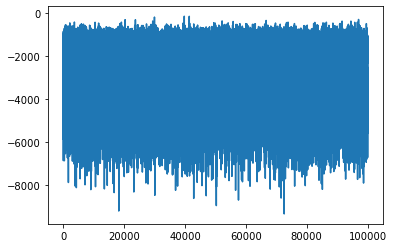

In [12]:
sns.lineplot(x = list(range(episode)), y = reward)

In [13]:
# Testing
date = []
time = []
price = []
en_cost = []
total_en = []
generation = []
fixed = []
net = []
# Randomly sample 5 days for testing
for episode in range(len(test)): 
    s = env.reset()
    while True:
        state = int(find_index(s, 40772391, 24921, 33, 0.1))
        action = np.argmax(qtable[state])
        date.append(env.cur_date)
        time.append(env.time)
        price.append(env.price)
        generation.append(env.generation)
        fixed.append(env.fixed_cost)
        net.append(env.fixed_cost + env.cur_energy - env.generation)
        s_, rewards, done, info = env.step(action) 
        en_cost.append(env.cur_energy)
        #env.render(action)
        s = s_
        if done:
            total_en.append(env.total_energy_cost)
            break

In [14]:
re

NameError: name 're' is not defined

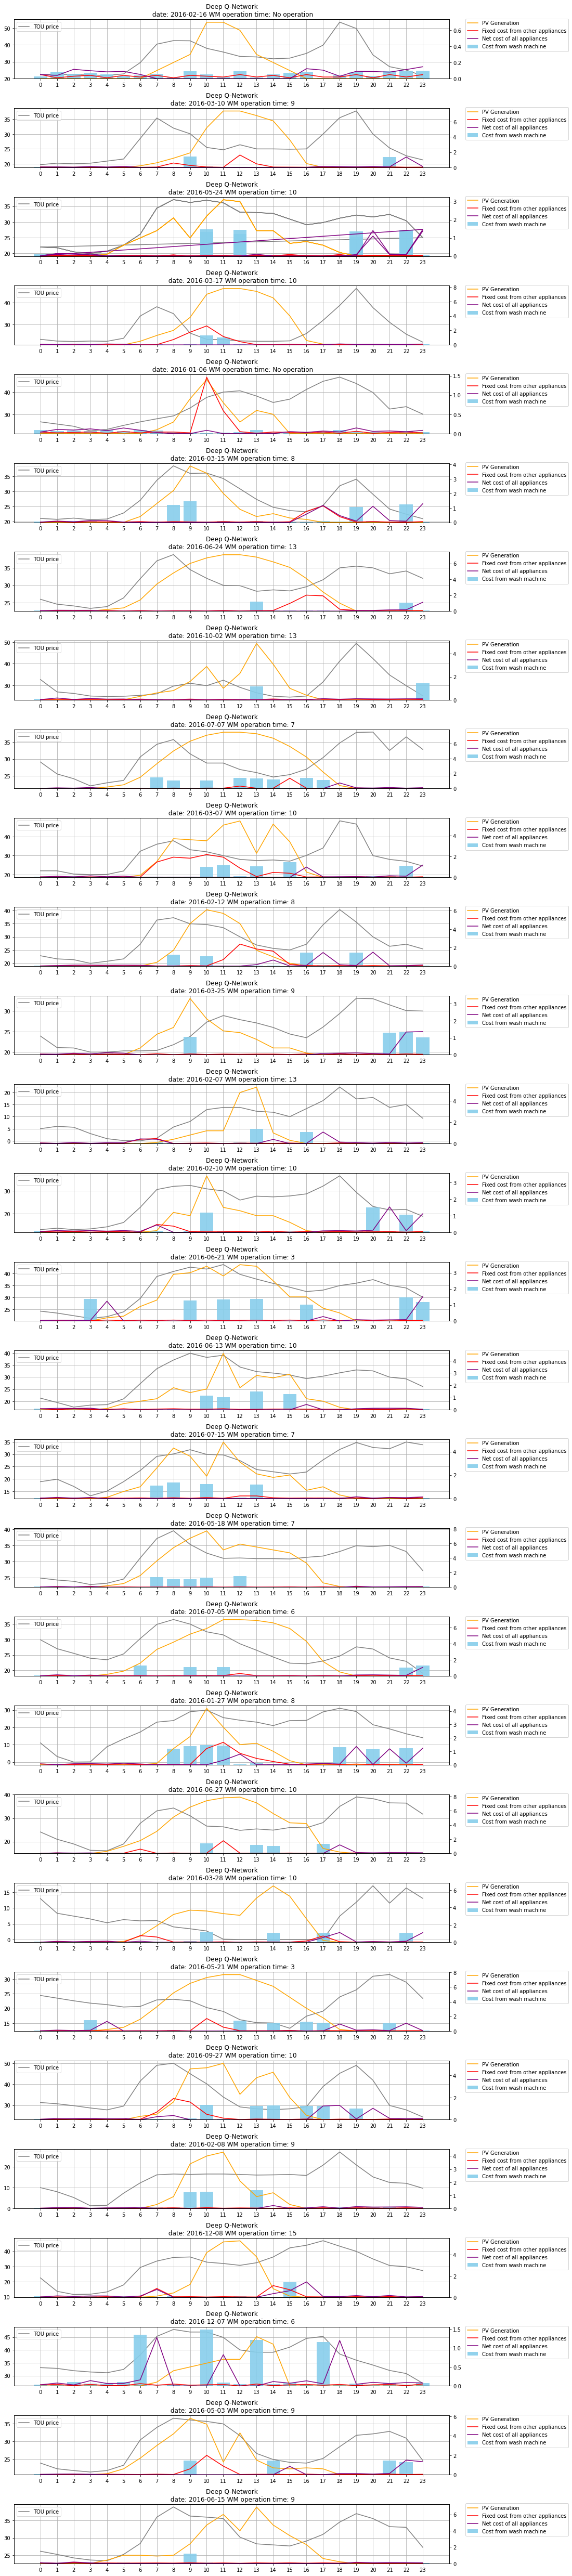

In [15]:
re = pd.DataFrame({'date':date, 't':time, 'energy_cost':en_cost, 'price':price, 'generation':generation, 
                   'fixed': fixed, 'net': net})
re.net = re.net.apply(lambda x: 0 if x < 0 else x)
d = list(re.date.unique())
fig, axes = plt.subplots(len(d),1,figsize = (15,90))
plt.subplots_adjust(hspace = 0.5)

for i in range(len(d)):
    axes2 = axes[i].twinx()
    axes[i].plot(re[re.date == d[i]].t, re[re.date == d[i]].price, color = 'grey')
    axes2.bar(re[re.date == d[i]].t, re[re.date == d[i]].energy_cost, color = 'skyblue', alpha = 0.9)
    axes2.plot(re[re.date == d[i]].t, re[re.date == d[i]].generation, color = 'orange')
    axes2.plot(re[re.date == d[i]].t, re[re.date == d[i]].fixed, color = 'red')
    axes2.plot(re[re.date == d[i]].t, re[re.date == d[i]].net, color = 'purple')
  # axes2.set_ylim([0, 1.5])
    axes[i].grid()
    try:
        axes[i].title.set_text('Deep Q-Network\n date: ' + d[i] + ' WM operation time: ' + str(re[(re.date == d[i]) & (re.energy_cost >= 1)].t.values[0]))
    except:
        axes[i].title.set_text('Deep Q-Network\n date: ' + d[i] + ' WM operation time: ' + 'No operation')
    # axes[i].title.set_text(d[i] + ' The total energy of all appliances = ' + str(total_en[i]))
    axes[i].legend(['TOU price'], loc = 'upper left')
    axes2.legend(['PV Generation', 'Fixed cost from other appliances', 'Net cost of all appliances', 'Cost from wash machine'], bbox_to_anchor=(1.28, 1.06), loc="upper right")
    plt.xticks(np.arange(0,24))
plt.show()